In [1]:
import pandas as pd
import pylab
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.decomposition import FactorAnalysis

https://www.kaggle.com/ronitf/heart-disease-uci

In [2]:
heart_data = pd.read_csv("datasets/heart.csv")

heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
x = heart_data.drop(["target"], axis = 1)

y = heart_data["target"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

### Baseline classification model which uses all of the existing features

In [4]:
model = LogisticRegression(solver = "liblinear")

In [5]:
model.fit(x_train, y_train)

print("Training Score :", model.score(x_train, y_train))

Training Score : 0.8512396694214877


In [6]:
y_pred = model.predict(x_test)

print("Testing Score :",  accuracy_score(y_test, y_pred))

Testing Score : 0.819672131147541


In [7]:
features = list(heart_data.columns[:-1])

features

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal']

In [8]:
len(features)

13

In [9]:
def perform_factor_analysis(x, y, n):
    
    fact_a = FactorAnalysis(n_components = n)
        
    x_new = fact_a.fit_transform(x, y)
        
    return fact_a, pd.DataFrame(x_new)

### Metrics to evaluate a classification model

- Accuracy: The proportion of correctly predicted values
- Precision: Of the positive predictions by the mode, the proportion that was actually correct
- Recall: Of the positive values in the data, the proportion correctly identified by the model


In [10]:
def compare_results(result_dict):
    
    for key in result_dict:
        print("Test :", key)
        
        print("Accuracy Score :", result_dict[key]["accuracy"])
        print("Precision Score :", result_dict[key]["precision"])
        print("Recall Score :", result_dict[key]["recall"])
        print()

In [11]:
def build_model(target,
                features,
                dataset,
                n_factors):
    
    x = dataset[features]
    y = dataset[target]
    
    fa_obj, x_new = perform_factor_analysis(x, y, n_factors)
    
    x_train, x_test, y_train, y_test = train_test_split(x_new, y, test_size = 0.2)
    
    model = LogisticRegression(solver = "liblinear").fit(x_train, y_train)
    
    y_pred = model.predict(x_test)
    
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    
    return {"fact_a_obj" : fa_obj,
            "transform_x" : x_new,
            "accuracy" : acc,
            "precision" : prec,
            "recall" : recall}

### Visualize how the accuracy score changes for different number of factors

In [12]:
def visualize_results(result_dict):
    
    n_factors = list(range(0, 13))

    acc = [result_dict[key]["accuracy"] for key in result_dict]
    
    plt.figure(figsize = (12, 10))
    plt.plot(n_factors, acc)
    
    pylab.ylim([0,1])
    
    plt.xlabel("n_factors")
    plt.ylabel("accuracy")

In [13]:
result_dict = {}

for i in range(1, 14):
    result_dict["n_factors - " + str(i)] = build_model("target", features, heart_data, i)

In [14]:
compare_results(result_dict)

Test : n_factors - 1
Accuracy Score : 0.47540983606557374
Precision Score : 0.48214285714285715
Recall Score : 0.9

Test : n_factors - 2
Accuracy Score : 0.7377049180327869
Precision Score : 0.7058823529411765
Recall Score : 0.8

Test : n_factors - 3
Accuracy Score : 0.7704918032786885
Precision Score : 0.7837837837837838
Recall Score : 0.8285714285714286

Test : n_factors - 4
Accuracy Score : 0.6885245901639344
Precision Score : 0.7222222222222222
Recall Score : 0.7428571428571429

Test : n_factors - 5
Accuracy Score : 0.7540983606557377
Precision Score : 0.7222222222222222
Recall Score : 0.8387096774193549

Test : n_factors - 6
Accuracy Score : 0.7377049180327869
Precision Score : 0.75
Recall Score : 0.7941176470588235

Test : n_factors - 7
Accuracy Score : 0.9344262295081968
Precision Score : 0.9428571428571428
Recall Score : 0.9428571428571428

Test : n_factors - 8
Accuracy Score : 0.8524590163934426
Precision Score : 0.8461538461538461
Recall Score : 0.9166666666666666

Test : n_f

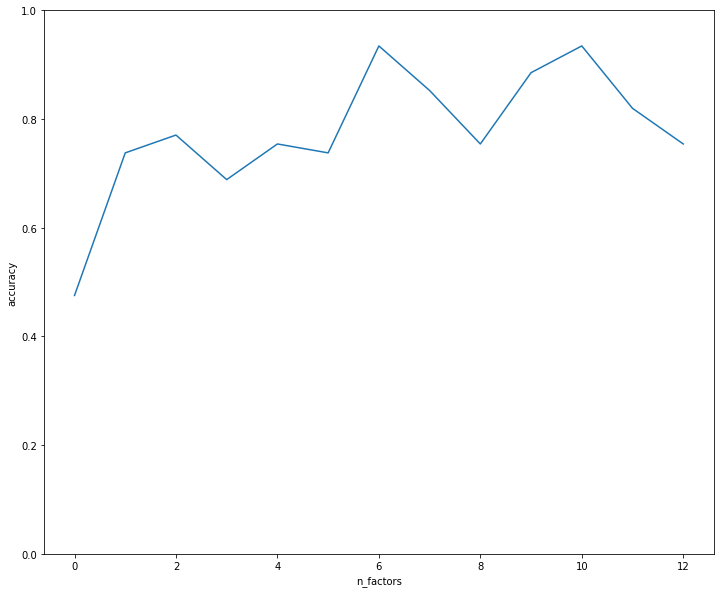

In [15]:
visualize_results(result_dict)